In [2]:
import ROOT as r
from omega_a_fitting import *
from fit_util import *
from start_time_scan import *
f = r.TFile("./PileupCorrection_TcOver6Binning_FullIslands_2019_07_17.root")
f.ls()

clusters = f.Get("h_doublePileupCorrected").Clone()
clusters.Rebin2D(6,1)

Welcome to JupyROOT 6.12/06


<ROOT.TH2D object ("h_doublePileupCorrected") at 0x7fffceeaeca0>

In [3]:
e1 = 1700
e2 = 3100
calo = 0

#wiggle = MakeWiggleFromTH3(clusters, e1, e2, calo)
wiggle = MakeWiggleFromTH2(clusters, e1, e2, calo, 1, True)
fitFunc = WiggleFit(GetBlindingPhrase("./blinding.txt"), "5par")

 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +
 +                                                                      +
 +           You have chose to blind your fitting according to          +
 +                omega_ref * (1 + (R +/- deltaR) *10^{-6})             +
 +                                                                      +
 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +


In [4]:
tLow = 25
tHigh = 325
nScans = 100
tFixed = 650
initialParameters = [700000,64.4,0.33,-33,5.11]

In [5]:
ding = TimeScan( fitFunc, wiggle.h, tLow, tHigh, nScans, tFixed, initialParameters, nPar = 5, functionName="5par", startOrEnd = "start" )
ding.verbosity = 10
ding.nFits = 1

In [6]:
ding.DoScan()

Performing time scan with bounds: 25 325 in 100 steps
Times:  [24.84015345268542, 27.823955669224212, 30.95694799658994, 33.94075021312873, 36.92455242966752, 40.05754475703325, 43.04134697357204, 46.02514919011083, 49.15814151747656, 52.14194373401535, 55.12574595055414, 58.25873827791987, 61.24254049445866, 64.22634271099744, 67.21014492753623, 70.34313725490196, 73.32693947144075, 76.31074168797954, 79.44373401534527, 82.42753623188406, 85.41133844842285, 88.54433077578858, 91.52813299232737, 94.51193520886616, 97.64492753623189, 100.62872975277068, 103.61253196930947, 106.59633418584826, 109.72932651321399, 112.71312872975278, 115.69693094629156, 118.8299232736573, 121.81372549019608, 124.79752770673487, 127.93052003410062, 130.9143222506394, 133.8981244671782, 137.03111679454392, 140.01491901108272, 142.9987212276215, 146.13171355498724, 149.11551577152602, 152.09931798806483, 155.0831202046036, 158.21611253196934, 161.19991474850812, 164.1837169650469, 167.31670929241264, 170.300

Warning in <TF1::AddToGlobalList>: Function is supposed to be in the global list but it is not present
Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1
Warning in <TF1::AddToGlobalList>: Function is supposed to be in the global list but it is not present
Warning in <TF1::AddToGlobalList>: Function is supposed to be in the global list but it is not present
Warning in <TF1::AddToGlobalList>: Function is supposed to be in the global list but it is not present
Warning in <TF1::AddToGlobalList>: Function is supposed to be in the global list but it is not present
Warning in <TF1::AddToGlobalList>: Function is supposed to be in the global list but it is not present
Warning in <TF1::AddToGlobalList>: Function is supposed to be in the global list but it is not present
Warning in <TF1::AddToGlobalList>: Function is supposed to be in the global list but it is not present
Warning in <TF1::AddToGlobalList>: Function is supposed to be in the global list but it is not present
W

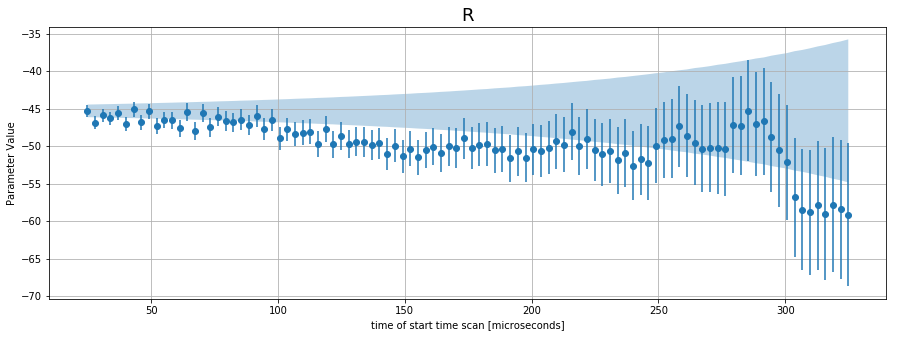

In [14]:
par = 3
ding.PlotStartTimeScan(par,ding.parameterNames[par])

In [8]:
ding.ComputeKawallBand(3)

[0.8406726577196405,
 0.8598421548662362,
 0.8842276576339324,
 0.9008652411106538,
 0.9263968065604596,
 0.9480500476707917,
 0.9671918908579045,
 0.9974826123125985,
 1.0160891505514202,
 1.0436335399297796,
 1.06945699920881,
 1.094636355439253,
 1.1234226491676789,
 1.14560067310304,
 1.173613075542817,
 1.2054542213566983,
 1.2280569738607021,
 1.2640041331059204,
 1.2920490362649744,
 1.3192355774991005,
 1.3588137662040218,
 1.3853010862042938,
 1.420858466666871,
 1.4572707318691394,
 1.4903218557957014,
 1.5303752205336627,
 1.5616321990176145,
 1.6058020185486914,
 1.6437313923600165,
 1.6768145719422063,
 1.7252992825006948,
 1.7620489735408236,
 1.8012400400853519,
 1.8538853746332122,
 1.8940790474592402,
 1.9406468190376887,
 1.9875759612205899,
 2.035806612505958,
 2.0897994708074203,
 2.130187114593618,
 2.194019515445308,
 2.2433141714091387,
 2.2905425147132275,
 2.357371264900675,
 2.406251221468865,
 2.4625993185298007,
 2.532048153892948,
 2.5851157473373503,
 2.65

In [9]:
DumpClass(ding)

Dumping:  <start_time_scan.TimeScan object at 0x7f845651c240>
Class:  <class 'start_time_scan.TimeScan'>
    fitter = <omega_a_fitting.WiggleFit object at 0x7f8456508a58>
    h = <ROOT.TH1D object ("StartTimeScanHist") at 0x7fffcfbf45e0>
    tLow = 25
    tHigh = 325
    nScans = 100
    tFixed = 650
    initialParameters = [700000, 64.4, 0.33, -33, 5.11]
    StartOrEnd = start
    nPar = 5
    functionName = 5par
    nFits = 1
    parameters = [[7763566.211199156, 64.37787575669385, 0.3755203405925184, -45.30024467900424, -7.344366323634261], [7763426.00599783, 64.3783997738313, -0.3754460983786367, -46.88308241485657, 8.363950914877817], [7760951.696798284, 64.38682702833457, 0.3752060336129985, -45.89678050282962, 5.222131812398636], [7760012.654169949, 64.38992352961056, 0.3751169135902033, -46.3077945072051, 24.071784199561936], [7759515.972586288, 64.39157289287284, -0.37497231651652374, -45.52507715653213, -41.90185060510421], [7758199.259342852, 64.39581809186777, 0.37485896579